In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [4]:
train_df.sample(10)

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
7143,csid_7144,19.486836,6.371668,0.094389,0.061216,0.244827,4.058817,4.096487,32.311579,C,AA,0
5051,csid_5052,32.410567,6.367711,-0.055698,-0.085515,2.201222,6.252873,2.995260,3.525725,A,F,0
2806,csid_2807,13.155658,5.870085,0.197319,0.169298,0.629337,4.956627,3.560961,20.832890,C,BA,0
10271,csid_10272,10.374979,4.218322,-0.032066,0.230269,0.295392,4.002249,4.557559,16.439162,B,BA,0
4562,csid_4563,13.105555,NaN,0.030198,-0.075666,0.689993,5.291897,2.857774,17.282211,B,BA,0
7467,csid_7468,32.250898,5.885437,-0.109489,-0.091438,0.586479,5.928649,2.794715,7.132205,A,BA,0
2084,csid_2085,23.189565,4.896363,0.247040,0.257255,0.643162,4.471787,2.575410,11.565976,C,A,0
9864,csid_9865,11.406059,6.706598,0.061200,-0.041920,0.415066,5.321291,3.518929,13.854851,B,A,0
4919,csid_4920,17.477732,2.676962,0.257264,0.494531,0.708140,5.537030,3.619804,14.835863,B,A,0
5612,csid_5613,15.274044,7.261845,0.011098,-0.058249,0.113420,4.137841,4.669279,33.660011,B,AA,0


In [4]:
train_df['customer_active_segment'].unique() #Categorization of customer based on activity

array(['C', 'AA', 'B', 'A', 'D', nan], dtype=object)

In [5]:
train_df['X1'].unique()  # Anoymized feature based on loyality of the customer

array(['F', 'A', 'BA', 'AA', 'E', nan], dtype=object)

In [6]:
train_df['customer_active_segment'].isnull().sum()

23

In [7]:
train_df['X1'].isnull().sum()

37

In [8]:
train_df.isnull().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

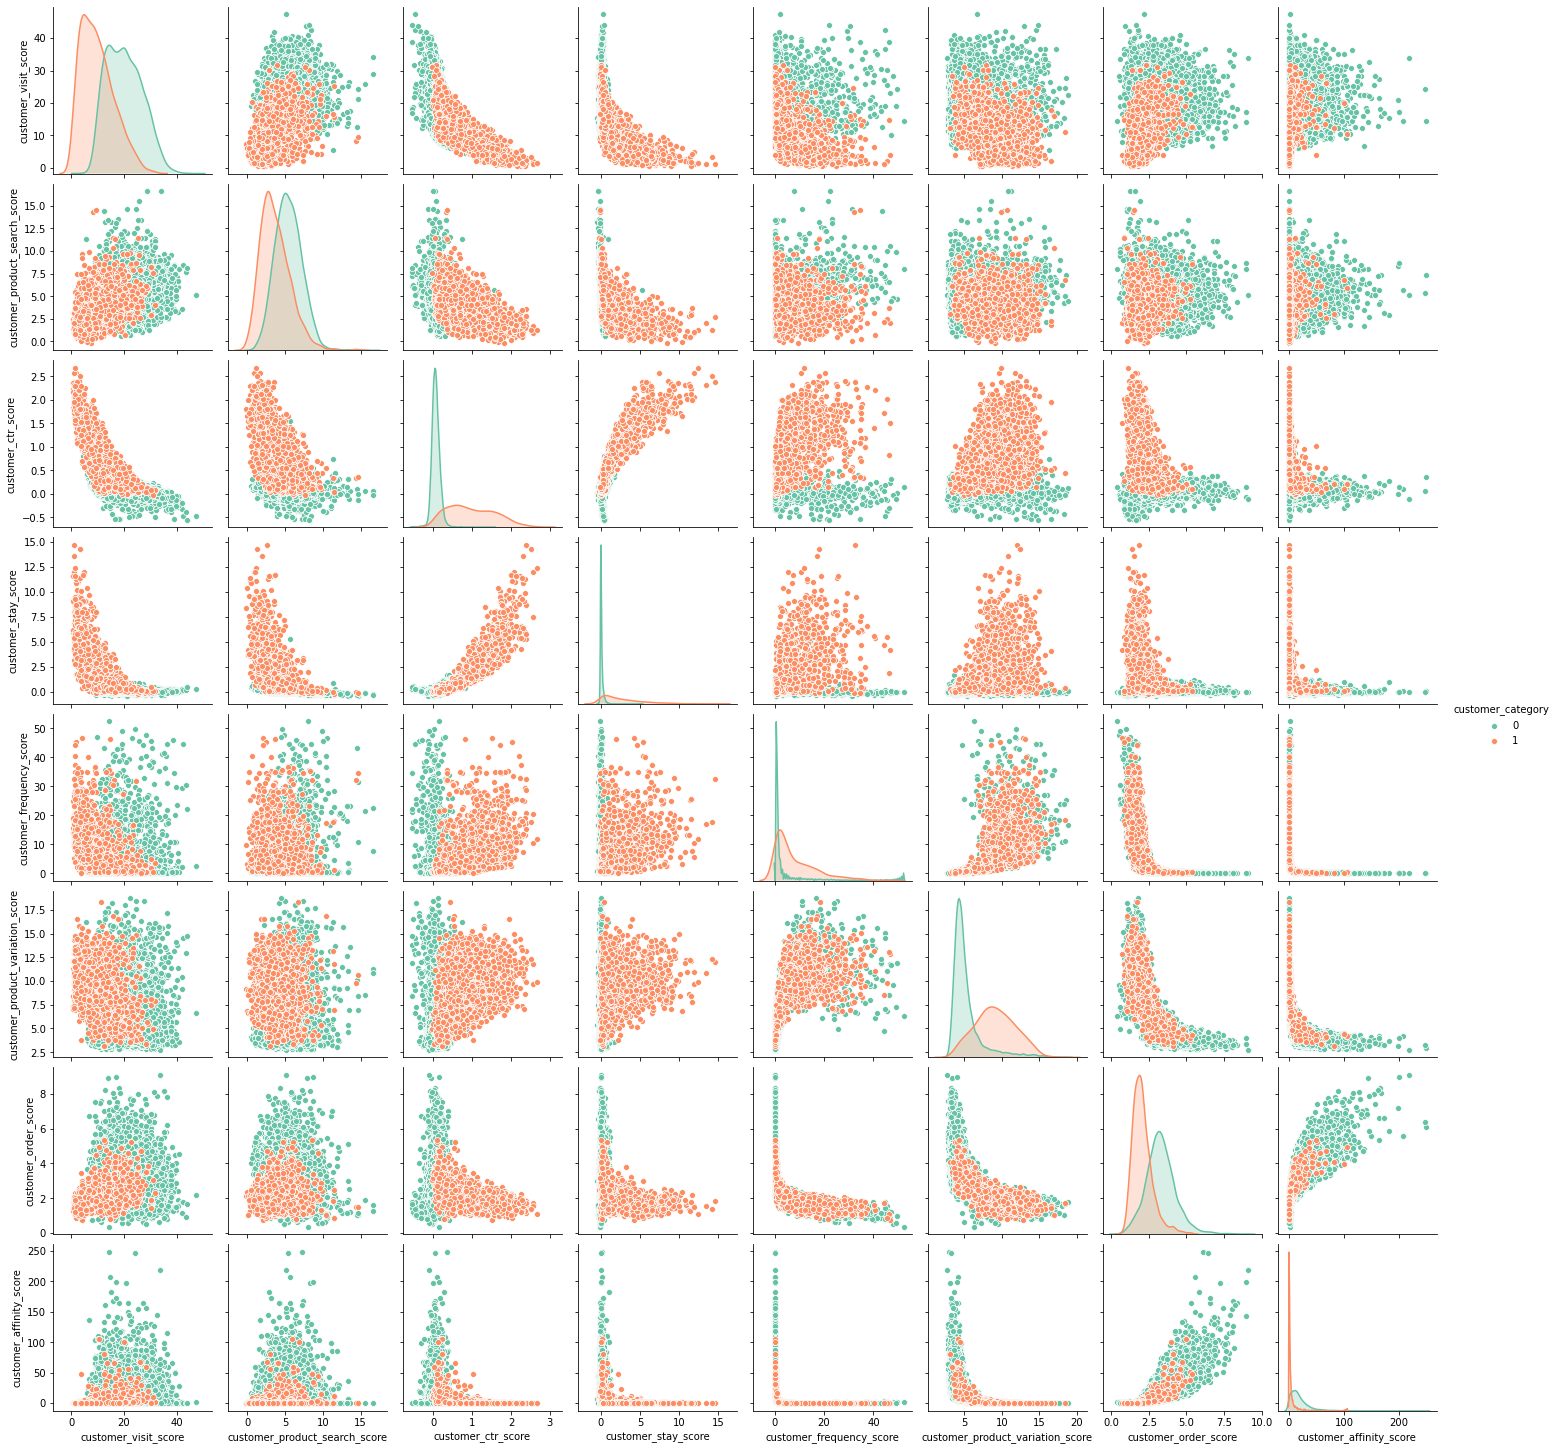

In [9]:
sns.pairplot(train_df, kind="scatter",hue="customer_category", palette="Set2")

Above Plt Analysis
1. customer affinity score--> 90 % of the customers whose having affinity score > 40

In [9]:
train_d_new = train_df[train_df['customer_affinity_score']<25]
train_d_new

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
5,csid_6,9.007922,7.051568,0.161564,0.040997,0.191935,4.209840,3.181961,18.862680,C,BA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10731,csid_10732,29.094167,6.391500,-0.051283,-0.079743,0.434865,4.791949,2.244512,6.251333,B,BA,0
10732,csid_10733,14.664036,5.341811,0.043920,-0.125090,0.269019,4.563034,3.685176,14.066261,C,A,0
10733,csid_10734,23.672615,6.701514,0.092879,-0.017332,1.210397,7.003663,3.027084,1.952911,C,BA,0
10734,csid_10735,25.673028,6.497796,0.050216,-0.047211,0.725230,5.407507,3.104172,5.124286,C,BA,0


In [10]:
train_df['customer_affinity_score'].describe()

count    10738.000000
mean        17.061836
std         18.762693
min         -0.486834
25%          4.530085
50%         12.653357
75%         23.114577
max        248.552755
Name: customer_affinity_score, dtype: float64

In [11]:
dict(train_df['customer_active_segment'].value_counts(normalize=True) * 100)

{'C': 45.907606159589356,
 'B': 41.343910405972935,
 'D': 5.002333177788147,
 'AA': 3.901073261782548,
 'A': 3.845076994867009}

In [15]:
customer_active_segment = train_df[train_df['customer_active_segment']=='C']

In [11]:
customer_active_segment['customer_category'].value_counts(normalize=True) * 100

0    99.514563
1     0.485437
Name: customer_category, dtype: float64

In [12]:
customer_active_segment.corr()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.000000,0.002436,-0.485336,0.120065,0.120794,0.105339,-0.045823,-0.011153,-0.064915
customer_product_search_score,0.002436,1.000000,-0.064521,-0.477956,0.121027,0.123463,-0.114272,-0.092727,0.082773
customer_ctr_score,-0.485336,-0.064521,1.000000,-0.155170,-0.366034,-0.204352,0.120500,0.013071,0.049872
customer_stay_score,0.120065,-0.477956,-0.155170,1.000000,-0.044702,-0.078088,0.094774,0.091834,-0.007802
customer_frequency_score,0.120794,0.121027,-0.366034,-0.044702,1.000000,0.610001,-0.487469,-0.309881,-0.015043
customer_product_variation_score,0.105339,0.123463,-0.204352,-0.078088,0.610001,1.000000,-0.677503,-0.546160,0.012724
customer_order_score,-0.045823,-0.114272,0.120500,0.094774,-0.487469,-0.677503,1.000000,0.781089,-0.048188
customer_affinity_score,-0.011153,-0.092727,0.013071,0.091834,-0.309881,-0.546160,0.781089,1.000000,-0.042503
customer_category,-0.064915,0.082773,0.049872,-0.007802,-0.015043,0.012724,-0.048188,-0.042503,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

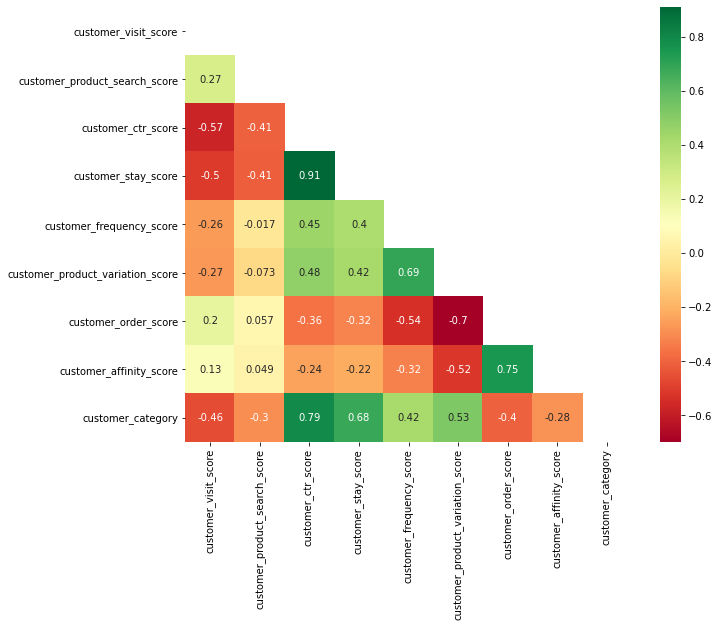

In [16]:
mask = np.zeros_like(customer_active_segment.corr())
tarinagle_indices = np.triu_indices_from(mask)
mask[tarinagle_indices]=True
sns.heatmap(customer_active_segment.corr(),mask=mask,annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

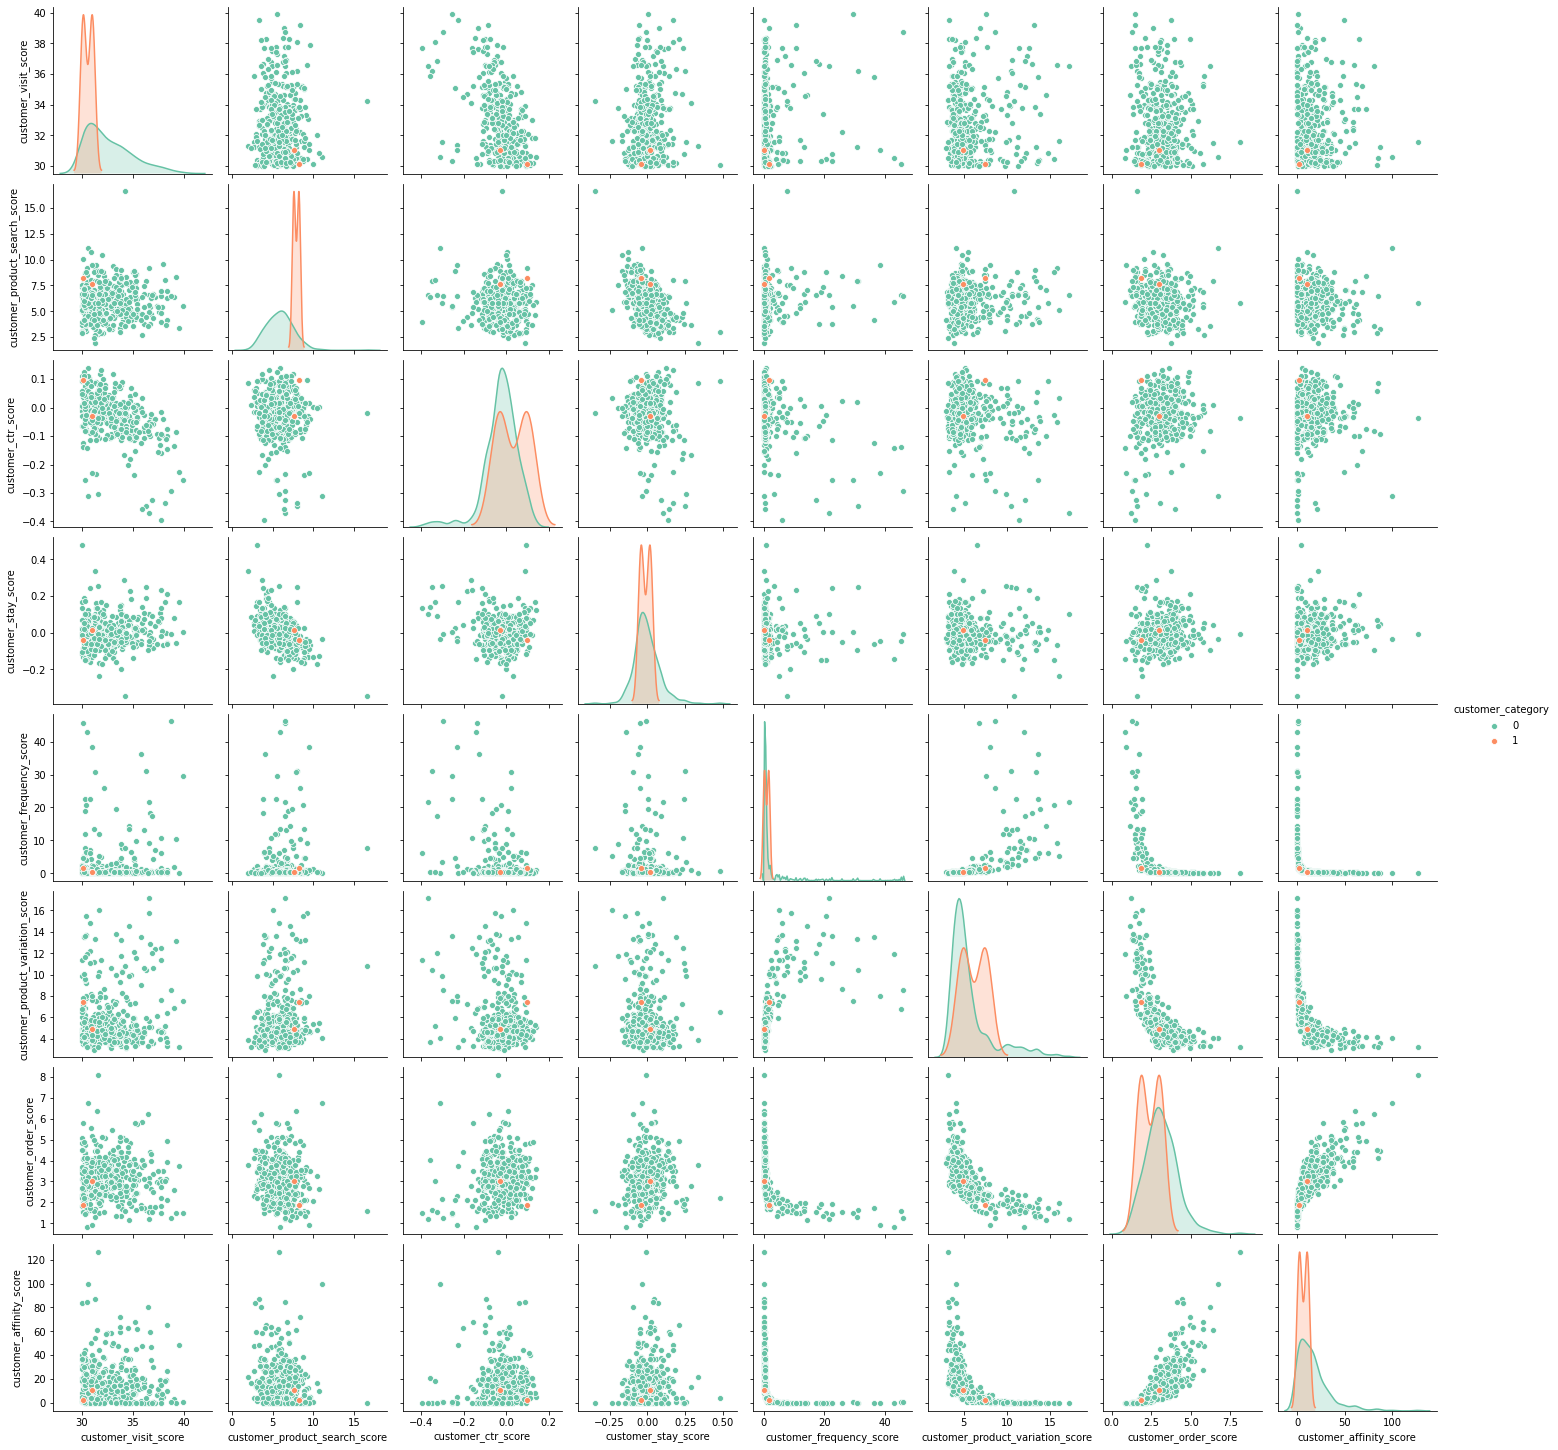

In [15]:
sns.pairplot(customer_active_segment, kind="scatter",hue="customer_category", palette="Set2")
plt.show

 {'C': 45.907606159589356,
 'B': 41.343910405972935,
 'D': 5.002333177788147,
 'AA': 3.901073261782548,
 'A': 3.845076994867009}
 <br>
<b>Category segement</b>
<ol>
    <li>customer With Category segement --> A  0    99.514563  | 1     0.485437 <br><br>
        <b>positive correlation betwwen</b>
        <ul>
            <li>affinity_score and order_score </li>
               <li>product variation score and frequency score ** means customer visiting many times a days to chance the product </li>
        </ul>
        <br>
        <b>negative correlation</b>
       <ul>
           <li>customer order score and product variation score</li>
           <li>order score and frequency score</li>
           <li>affinity score and product variation score</li>
           <li>ctr score and visit score</li>
           <li>stay score and product search rate`</li>
        </ul>
    </li>
    <br>
    <li>customer With Category segement --> B  0    93.589165 | 1     6.410835</li>
   B almost similar to A
    <li>customer With Category segement --> C  0    87.314495 | 1    12.685505</li>
   C almost similar to A
    <li>customer With Category segement --> D  1    71.08209 | 0    28.91791</li>
   D almost similar to A
    <li> customer With Category segement --> AA  0    99.521531 | 1     0.478469 </li>
   AA almost similar to A
    <li> customer With Category segement --> Nan  0    91.304348 | 1     8.695652 </li>
   nan metrics looks between B and C
</ol>

In [16]:
train_df['X1'].unique() 

array(['F', 'A', 'BA', 'AA', 'E', nan], dtype=object)

In [17]:
dict(train_df['X1'].value_counts(normalize=True) * 100)

{'BA': 42.15493879076722,
 'A': 21.194280908326323,
 'F': 20.885898514157557,
 'AA': 15.054667788057191,
 'E': 0.7102139986917111}

In [18]:
loyality = train_df[train_df['X1']=='E']

In [19]:
dict(loyality['customer_category'].value_counts(normalize=True) * 100)

{0: 97.36842105263158, 1: 2.631578947368421}

<function matplotlib.pyplot.show(close=None, block=None)>

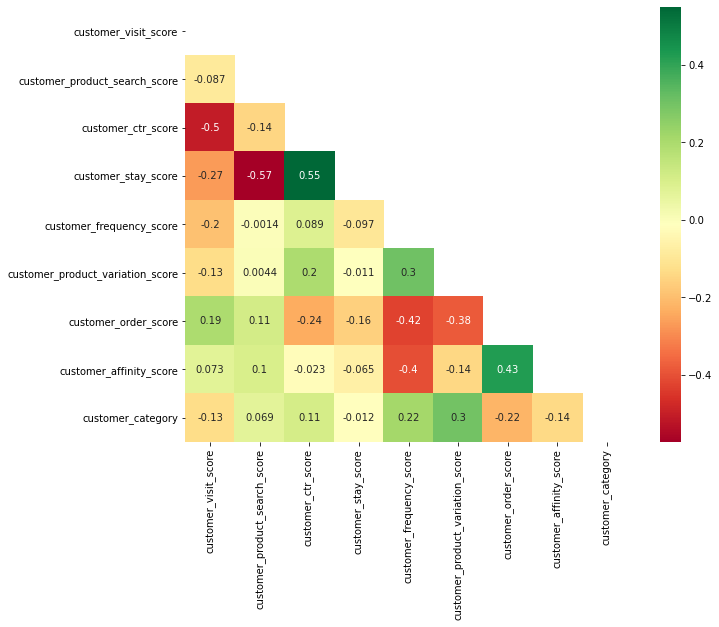

In [20]:
mask = np.zeros_like(loyality.corr())
tarinagle_indices = np.triu_indices_from(mask)
mask[tarinagle_indices]=True
sns.heatmap(loyality.corr(),mask=mask,annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

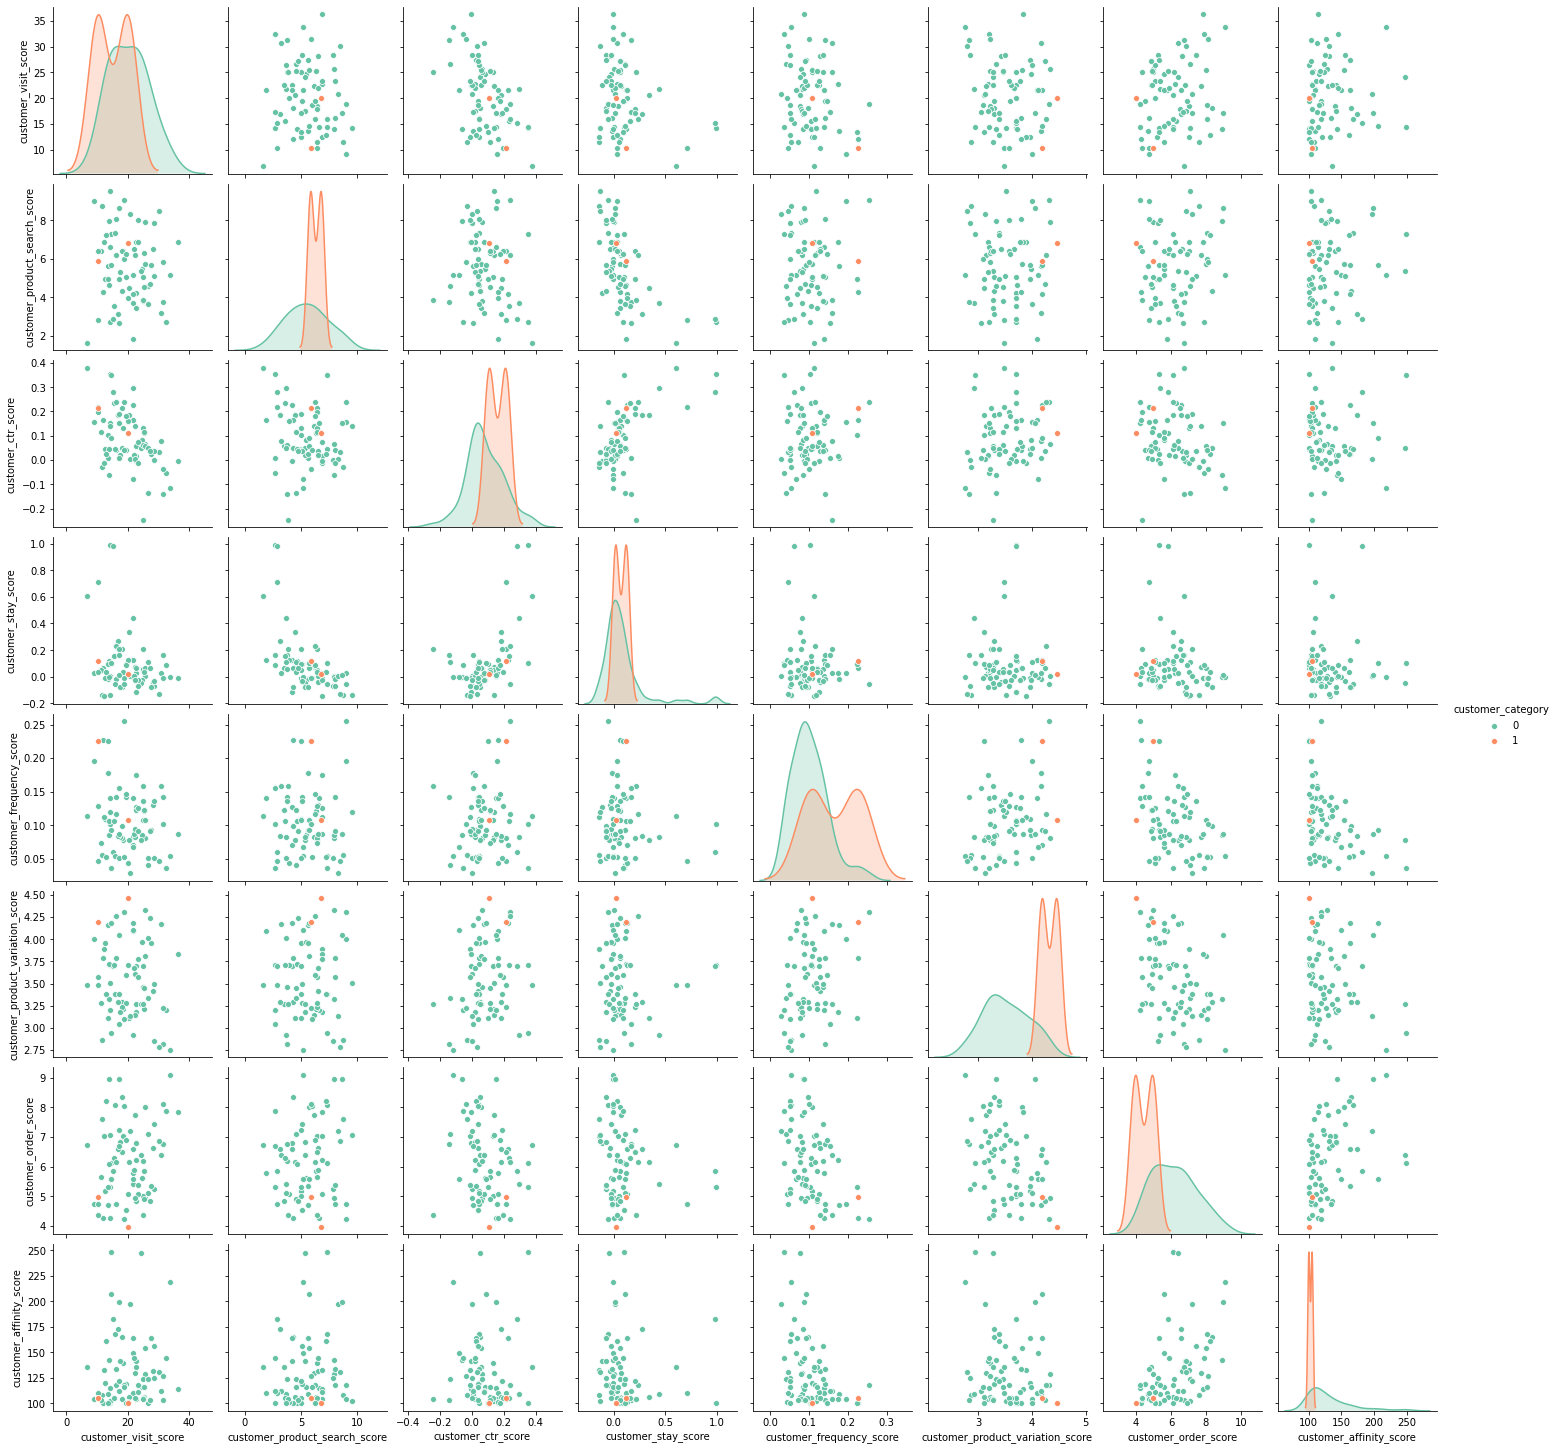

In [21]:
sns.pairplot(loyality, kind="scatter",hue="customer_category", palette="Set2")
plt.show

1. customer With Loyality --> {0: 98.58906525573192, 1: 1.4109347442680775} 
    <br>
     <b>also has strong correlation betwwen</b><br>
    -> affinity_score and order_score <br>
    -> product variation score and frequency score ** means customer visiting many times a days to chance the product **
    <br>
    <b>negative correlation </b><br>
    -> customer order score and product variation score <br>
    -> order score and frequency score <br>
    -> affinity score and product variation score <br>
    -> ctr score and visit score <br>
    -> stay score and product search rate
    <br>
2. customer With Loyalityt --> E {0: 97.36842105263158, 1: 2.631578947368421}  E almost similar to A
<br>
3. customer With Loyality --> F {0: 74.1834451901566, 1: 25.8165548098434}  F almost similar to A
<br>
4. customer With Loyality --> AA {0: 98.63438857852266, 1: 1.3656114214773432}  AA almost similar to A
<br>
5. customer With Loyality --> BA {0: 85.41343382841941, 1: 14.58656617158058} BA almost similar to A
<br>
6. customer With Loyality --> Nan {0: 89.1891891891892, 1: 10.81081081081081} nan looks arounf BA

In [22]:
# Remove neagtive values to zero 
train_df[train_df['customer_affinity_score']<0]

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
92,csid_93,5.074714,3.232825,1.935050,6.089135,12.965956,9.922563,1.947647,-0.184121,C,F,1
94,csid_95,27.486292,3.396312,0.014656,-0.047712,8.017364,14.406890,1.657679,-0.277168,B,BA,0
134,csid_135,20.760115,7.069929,0.015513,-0.163295,13.615127,9.914498,1.688058,-0.190298,B,BA,0
227,csid_228,3.027312,2.976794,1.581598,4.689740,34.902877,9.346950,1.038054,-0.184536,D,BA,1
359,csid_360,6.474533,5.352678,0.690799,1.382588,19.935841,10.703605,1.832936,-0.249057,C,BA,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10641,csid_10642,5.770881,1.965461,1.643986,5.824426,12.101201,14.648622,1.325738,-0.248755,D,BA,1
10673,csid_10674,3.840788,7.425404,1.248447,3.201652,19.804119,8.917952,1.058483,-0.079199,C,BA,1
10698,csid_10699,17.498318,7.168869,0.421270,0.471320,9.096204,10.213519,1.805510,-0.187379,C,F,1
10699,csid_10700,21.649337,10.610017,0.004426,-0.144620,32.091950,12.272932,0.967125,-0.210892,B,BA,0


In [23]:
train_df[train_df['customer_active_segment'].isna()]

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
786,csid_787,22.558985,3.698032,0.088970,0.134925,0.203078,4.370322,2.984302,34.930526,NaN,AA,0
1204,csid_1205,28.983164,3.714139,-0.052482,0.269622,0.309216,4.249715,3.747923,36.015689,NaN,AA,0
1774,csid_1775,7.242760,3.354086,0.266073,0.563699,0.319198,4.941706,3.536417,14.021335,NaN,BA,0
1971,csid_1972,25.727630,7.748307,-0.001675,-0.090084,0.427364,5.621277,2.880804,19.798800,NaN,A,0
1982,csid_1983,18.463432,4.343687,0.178411,0.014157,0.733002,4.576995,2.909578,8.186632,NaN,BA,0
2110,csid_2111,16.189300,3.413473,0.133424,0.061990,0.240074,4.738037,2.823730,22.646276,NaN,A,0
3031,csid_3032,27.444705,6.965722,-0.025883,-0.025970,1.046338,5.468566,2.668303,2.726708,NaN,F,0
3492,csid_3493,17.260650,5.125916,0.091369,0.145551,0.318524,3.172130,4.607539,34.752637,NaN,AA,0
3612,csid_3613,20.818556,5.227684,0.003406,0.000714,0.315317,5.011255,3.116561,11.315526,NaN,BA,0
3616,csid_3617,19.380305,5.341641,0.070395,0.113743,0.380836,4.247361,4.501720,23.811081,NaN,A,0


In [24]:
train_df[train_df['customer_active_segment']=='C']

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0
5,csid_6,9.007922,7.051568,0.161564,0.040997,0.191935,4.209840,3.181961,18.862680,C,BA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10727,csid_10728,13.123107,10.215774,0.159733,-0.020733,2.462955,7.686074,1.666110,1.299393,C,F,0
10728,csid_10729,24.772317,4.753238,0.019578,-0.070097,0.556264,4.590020,3.126145,12.193862,C,A,0
10732,csid_10733,14.664036,5.341811,0.043920,-0.125090,0.269019,4.563034,3.685176,14.066261,C,A,0
10733,csid_10734,23.672615,6.701514,0.092879,-0.017332,1.210397,7.003663,3.027084,1.952911,C,BA,0


In [25]:
train_df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,23.672615,6.701514,0.092879,-0.017332,1.210397,7.003663,3.027084,1.952911,C,BA,0
10734,csid_10735,25.673028,6.497796,0.050216,-0.047211,0.725230,5.407507,3.104172,5.124286,C,BA,0
10735,csid_10736,31.676844,7.799880,0.062961,-0.032765,0.318118,5.598486,2.403051,21.864188,A,BA,0
10736,csid_10737,28.441780,5.588302,-0.093931,0.081586,0.132177,3.616492,4.972243,86.969977,B,AA,0


C:\Users\91830\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


customer_category
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

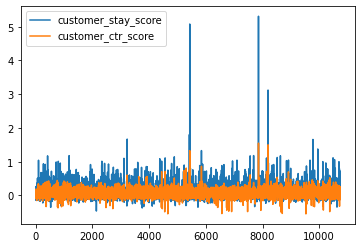

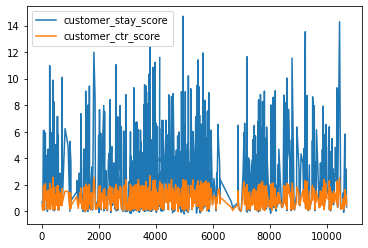

In [34]:
train_df.groupby('customer_category')['customer_stay_score','customer_ctr_score'].plot()

C:\Users\91830\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


customer_category
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

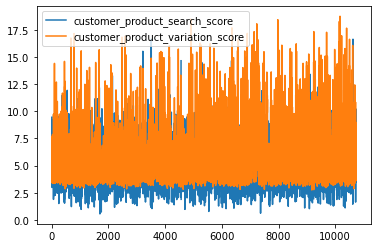

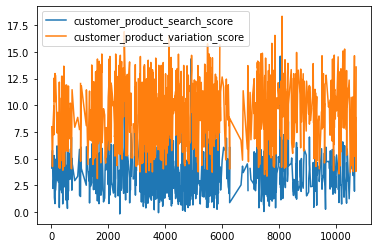

In [43]:
train_df.groupby('customer_category')['customer_product_search_score','customer_product_variation_score'].plot()

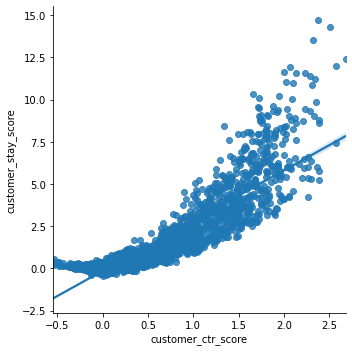

In [48]:
sns.lmplot(x='customer_ctr_score', y='customer_stay_score', data=train_df)

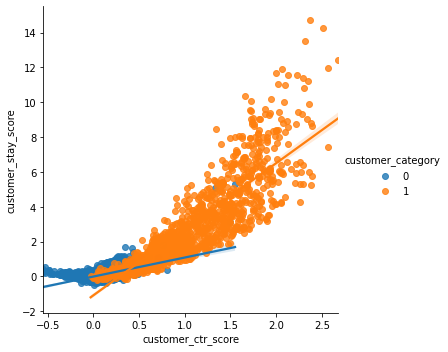

In [51]:
sns.lmplot(x='customer_ctr_score', y='customer_stay_score', data=train_df,
         hue='customer_category') 

<AxesSubplot:xlabel='customer_stay_score'>

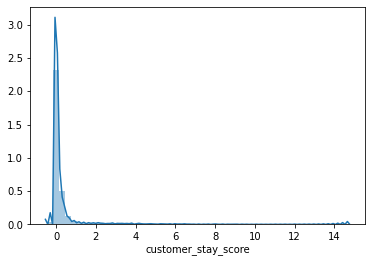

In [56]:
sns.distplot(train_df['customer_stay_score'])

<AxesSubplot:xlabel='customer_ctr_score'>

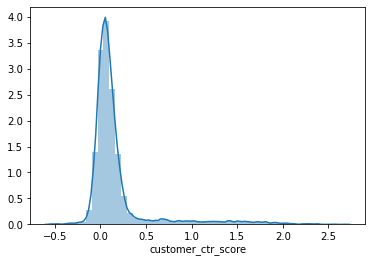

In [57]:
sns.distplot(train_df['customer_ctr_score'])

In [ ]:
sns.factorplot(x='customer_ctr_score', 
                   y='customer_stay_score', 
                   data=train_df, 
                   hue='customer_category',
                   col='customer_category')

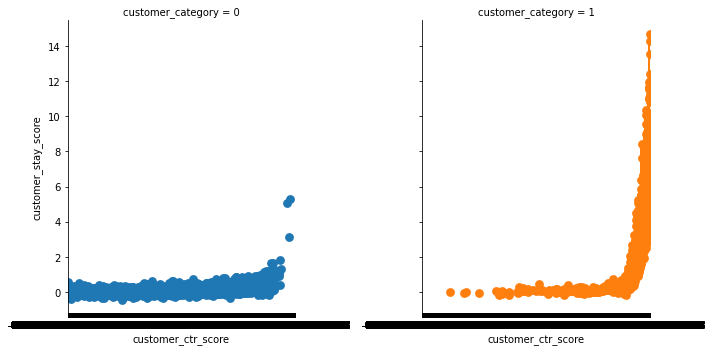

In [60]:
sns.factorplot(x='customer_ctr_score', 
                   y='customer_stay_score', 
                   data=train_df[['customer_ctr_score','customer_stay_score','customer_frequency_score','customer_category']], 
                   hue='customer_category',
                   col='customer_category')